# Autoencoders

An autoencoder encodes the input distribution into a low-dimensional vector that is commonly referred to as the **latent representation or vector or code**. The decoder the decode or reconstruct the latent vector to recover the original input. Since the latent vector is a low-dimensional compressed representation of the input data, the output recovered by the decoder is only an approximation of the input. Given an image, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to the original image. Autoencoders are made up of two parts

$\bullet$ **An encoder network** that compresses the high-dimensional input data into a lower dimensional latent vector. Since the latent vector is of low dimension, the encoder is forced to prioritize which aspects or features of the input should be learn or copied. It often learns useful properties of the data.

$\bullet$ **A decoder network** tries to reconstructe or recover as close as possible the original input data from the latent vector .

An autoencoder whose latent representation  dimension is less than the input dimension is called undercomplete and this forces the autoencoder to capture the most salient features of the training data


 The network is trained to minimize the loss
The Autoencoder network is trained to obtain weights for the encoder and decoder that best minimizes the loss between the original input and the reconstruction of the input after it has passed through the encoder and decoder.
 

x=input data
z=latent vector

$\acute x=$reconstructed image
encoder function $f$

decoder function $g$

$z=f(x)$

$\acute x=g(z)= g(f(x))$

$\acute x \approx x$


$\bullet$ Types of autoencoders based on size of hidden layer

**Undercomplete autoencoders** have hidden layer size smaller than input layer size. Dimension of embedded space or laten representation lower than that of input space

**Overcomplete autoencoders** have much larger hidden layer size. Regularize to avoid overfitting.

The latent space of autoencoders are unconstrained and are often not continuous ( they us have larger regions in  the latent space that does not correspond to any valid image)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras as K
import tensorflow as tf
from tensorflow.keras.models import Model
plt.rcParams['image.cmap']='gray'

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
x_train.shape, x_test.shape


((60000, 28, 28), (10000, 28, 28))

In [3]:
K.backend.clear_session()

In [4]:
latent_dim = 64

In [5]:

class Autoencoder(K.models.Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = K.Sequential([
                                     K.layers.Flatten(),
                                     K.layers.Dense(512, activation='relu'),
                                     K.layers.Dense(latent_dim, activation='relu')
                                     ])
        self.decoder = K.Sequential([
                                     K.layers.Dense(512, activation='relu'),
                                     K.layers.Dense(784, activation='sigmoid'),
                                     K.layers.Reshape((28, 28))
                                     ])

    def call(self, x):
        latent_vector = self.encoder(x)
        decoded = self.decoder(latent_vector)
        return decoded
    

In [6]:
autoencoder = Autoencoder(latent_dim=32) 

In [7]:
autoencoder.compile(optimizer='adam', loss=K.losses.mean_squared_error)

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0200 - val_loss: 0.0138
Epoch 2/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0126 - val_loss: 0.0119
Epoch 3/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0114 - val_loss: 0.0111
Epoch 4/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0108 - val_loss: 0.0109
Epoch 5/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0104 - val_loss: 0.0104
Epoch 6/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0101 - val_loss: 0.0102
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 8/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0097 - val_loss: 0.0099
Epoch 9/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0095 - val_loss: 0.0097
Epoch 10/20
1875/1875 [==============================] - 23s 12m

In [9]:
decoded_imgs=autoencoder.predict(x_test)

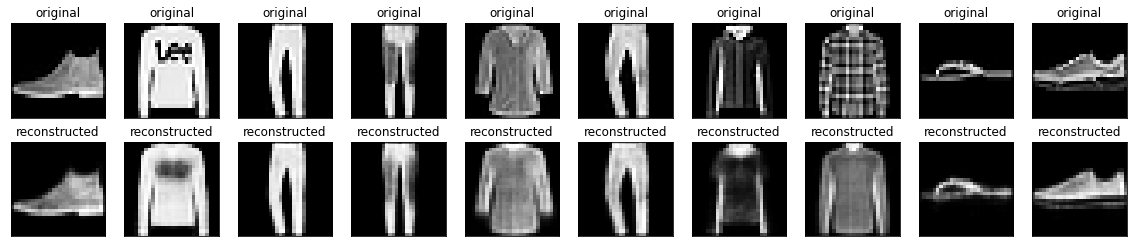

In [10]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [11]:
K.backend.clear_session()

In [12]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)


In [13]:
class AutoEncoder2(K.models.Model):
    def __init__(self,latent_dim):
        super().__init__()
        self.latent_dim=latent_dim
        self.encoder=K.models.Sequential([
                                        K.layers.InputLayer(input_shape=(28, 28, 1)),
                                        K.layers.Conv2D(32,kernel_size=2,padding='same',activation='relu'),
                                        K.layers.Conv2D(32,kernel_size=2,strides=2,padding='same',activation='relu'),
                                        K.layers.Conv2D(10,kernel_size=2,strides=2,padding='same',activation='relu'),
                                        K.layers.Flatten(),
                                        K.layers.Dense(self.latent_dim)
                                        ])
        self.decoder=K.models.Sequential([
                                    K.layers.Dense(units=7*7*10,activation='relu'),
                                    K.layers.Reshape(target_shape=( 7, 7, 10)),
                                    K.layers.Conv2DTranspose(10,kernel_size=2,strides=2,padding='same',activation='relu'),
                                    K.layers.Conv2DTranspose(32,kernel_size=2,strides=2,padding='same',activation='relu'),
                                    K.layers.Conv2DTranspose(32,kernel_size=2,padding='same',activation='relu'),
                                    K.layers.Conv2DTranspose(1,1,padding='same',activation='sigmoid')     
                                     ])
    def call(self,x):
        latent_vector=self.encoder(x)
        output=self.decoder(latent_vector)
        return output
    
    
autocencoder2=AutoEncoder2(latent_dim=latent_dim)

In [14]:
autocencoder2.compile(optimizer='adam', loss=K.losses.mean_squared_error)

In [15]:
autocencoder2.fit(x_train, x_train,
                epochs=20,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 107s 56ms/step - loss: 0.0249 - val_loss: 0.0129
Epoch 2/20
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0113 - val_loss: 0.0104
Epoch 3/20
1875/1875 [==============================] - 104s 56ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 4/20
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 5/20
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 6/20
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 7/20
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 8/20
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 9/20
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 10/20
1875/1875 [==============================] 

In [16]:
autocencoder2.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4128      
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 10)          1290      
                                                                 
 flatten (Flatten)           (None, 490)               0         
                                                                 
 dense (Dense)               (None, 64)                31424     
                                                                 
Total params: 37,002
Trainable params: 37,002
Non-trainable params: 0
_________________________________________________________________


In [17]:
autocencoder2.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 490)               31850     
                                                                 
 reshape (Reshape)           (None, 7, 7, 10)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 10)       410       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       1312      
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 32)       4128      
 ranspose)                                                       
                                                      

In [18]:
decoded_imgs=autocencoder2.predict(x_test)

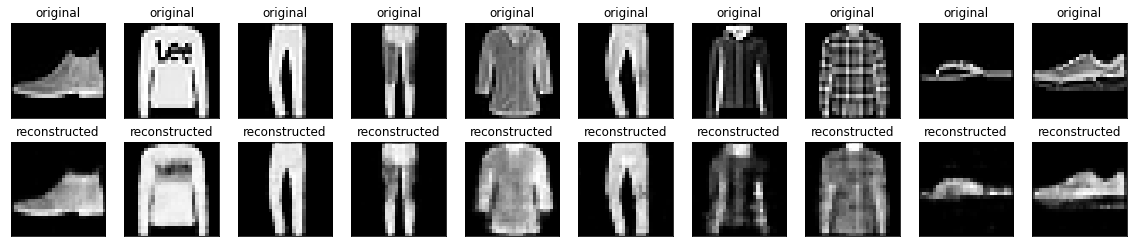

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

[Chapter 14: Autoencoders](https://www.deeplearningbook.org/contents/autoencoders.html)

[Wikipedia-Autoencoder](https://en.wikipedia.org/wiki/Autoencoder)